In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

from dolfin import *
from transient_adv import *

%matplotlib inline

plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
plt.rcParams.update({'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']})

In [6]:
# This script implements the skew-symmetric scheme mentioned in the following paper:
# Two-level schemes for the advection equation by Petr N. Vabishchevich.
# It consists of the theta family schemes and the R22 Pade schemes.

source = Constant(0.0)
init_cond = Expression('2e3*pow(x[0], 2)*pow(1.0-x[0], 4)*pow(x[1], 2)*pow(1.0-x[1], 4)', degree=1)

mesh_2d = RectangleMesh(Point(0,0), Point(1,1), 50, 50)
mesh_x = mesh_2d.coordinates()[:,0]
mesh_y = mesh_2d.coordinates()[:,1]
connectivity = mesh_2d.cells()

triang = Triangulation(mesh_x, mesh_y, connectivity)

CG_space = FunctionSpace(mesh_2d, 'CG', 1)
v_to_d = vertex_to_dof_map(CG_space)

In [8]:
dt_num = 0.005
end_time = 3.0
steps = int(end_time/dt_num)

# Explicit euler time stepping
u1 = transient_adv_2d_R11(mesh_2d, source, init_cond, dt_num=dt_num, steps=steps, theta_num=0.0)

200


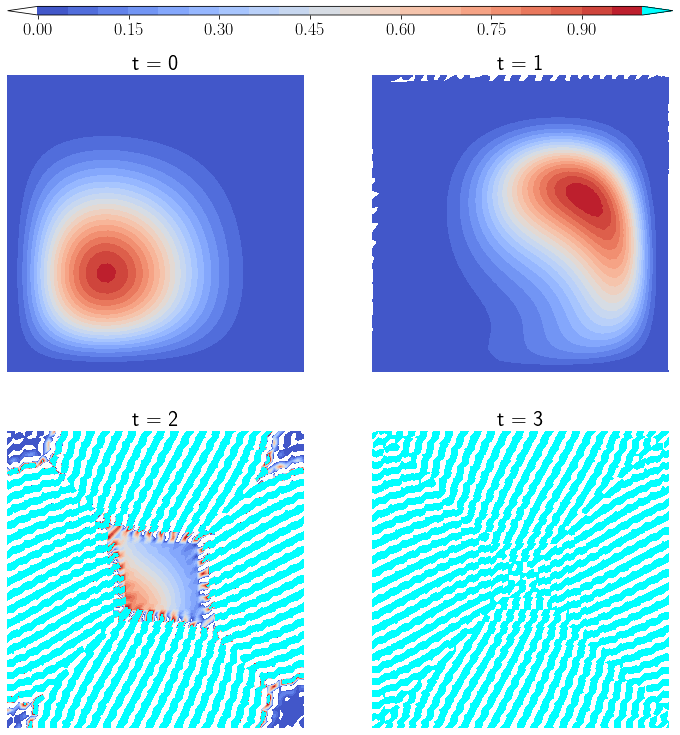

In [9]:
# The solution looks sharp in the beginning, but it eventually breaks down.
fig, ax = plt.subplots(2, 2, figsize=(12,12))

frame_index = int(1.0/dt_num)

print(frame_index)
for i, ax_elem in enumerate(ax.flatten()):
    cb = ax_elem.tricontourf(triang, u1[frame_index*i].vector()[v_to_d], cmap='coolwarm', levels=np.linspace(0, 1, 21), extend='both')
    cb.cmap.set_under('white')
    cb.cmap.set_over('cyan')
    ax_elem.set_aspect('equal')
    ax_elem.set_title('t = ' + str(i))

cbaxes = fig.add_axes([0.13, 0.95, 0.77, 0.01]) 
fig.colorbar(cb, cax=cbaxes, orientation='horizontal')

for ax_elem in ax.flatten():
    ax_elem.axis('off')
    
plt.show()

In [10]:
dt_num = 0.005
end_time = 3.0
steps = int(end_time/dt_num)

# Implicit euler time stepping
u1 = transient_adv_2d_R11(mesh_2d, source, init_cond, dt_num=dt_num, steps=steps, theta_num=1.0)

200


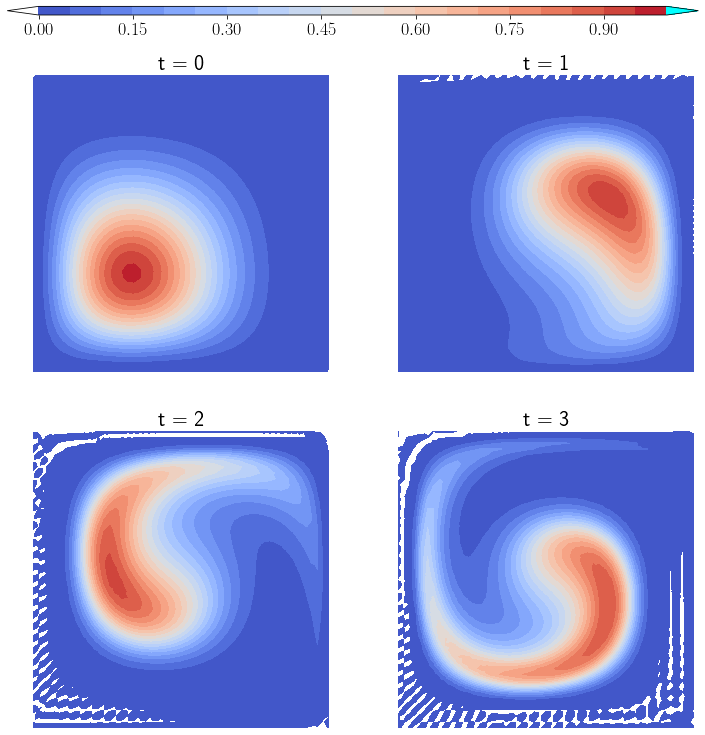

In [12]:
# The solution is overall stable, but it's diffusive.
# Notice the values between 0.95 and 1 disappeared after some timesteps.
fig, ax = plt.subplots(2, 2, figsize=(12,12))

frame_index = int(1.0/dt_num)

print(frame_index)
for i, ax_elem in enumerate(ax.flatten()):
    cb = ax_elem.tricontourf(triang, u1[frame_index*i].vector()[v_to_d], cmap='coolwarm', levels=np.linspace(0, 1, 21), extend='both')
    cb.cmap.set_under('white')
    cb.cmap.set_over('cyan')
    ax_elem.set_aspect('equal')
    ax_elem.set_title('t = ' + str(i))

cbaxes = fig.add_axes([0.1, 0.95, 0.8, 0.01]) 
fig.colorbar(cb, cax=cbaxes, orientation='horizontal')

for ax_elem in ax.flatten():
    ax_elem.axis('off')

plt.show()

In [11]:
dt_num = 0.005
end_time = 5.0
steps = int(end_time/dt_num)

# Crank-Nicolson time stepping
u1 = transient_adv_2d_R11(mesh_2d, source, init_cond, dt_num=dt_num, steps=steps, theta_num=0.5)

200


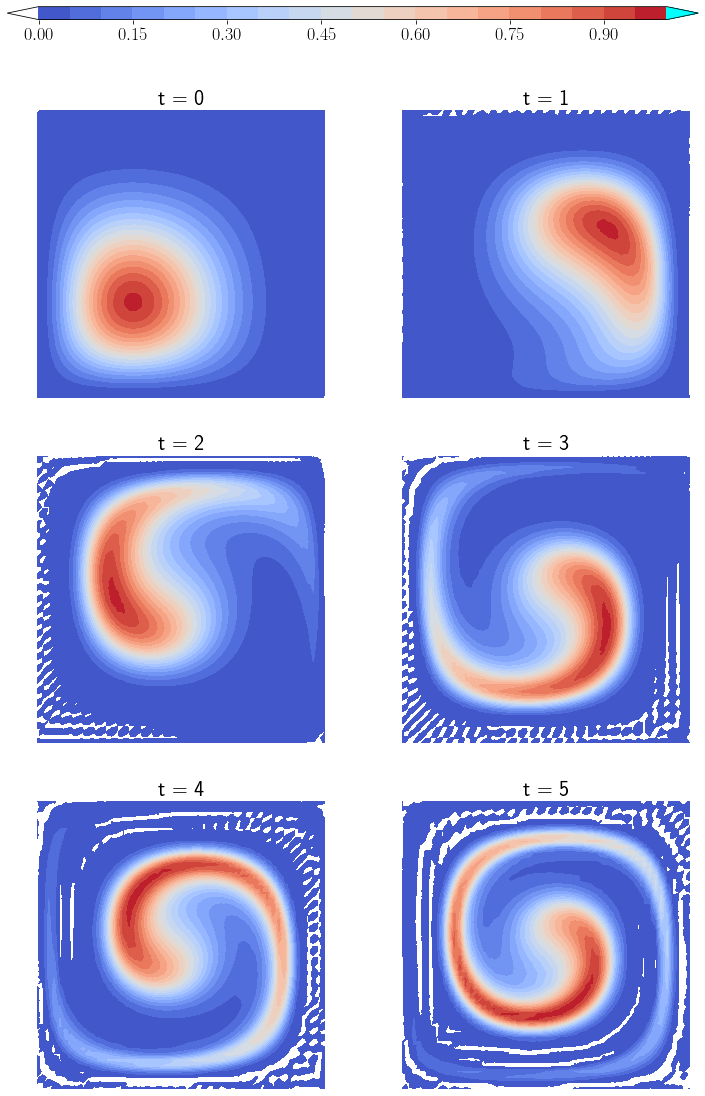

In [12]:
# The solution is stable, and it's not diffusive as the implicit Euler scheme.
fig, ax = plt.subplots(3, 2, figsize=(12,18))

frame_index = int(1.0/dt_num)

print(frame_index)
for i, ax_elem in enumerate(ax.flatten()):
    cb = ax_elem.tricontourf(triang, u1[frame_index*i].vector()[v_to_d], cmap='coolwarm', levels=np.linspace(0, 1, 21), extend='both')
    cb.cmap.set_under('white')
    cb.cmap.set_over('cyan')
    ax_elem.set_aspect('equal')
    ax_elem.set_title('t = ' + str(i))

cbaxes = fig.add_axes([0.1, 0.95, 0.8, 0.01]) 
fig.colorbar(cb, cax=cbaxes, orientation='horizontal')

for ax_elem in ax.flatten():
    ax_elem.axis('off')

plt.show()

In [15]:
dt_num = 0.02
end_time = 5.0
steps = int(end_time/dt_num)

# Crank-Nicolson time stepping
u1 = transient_adv_2d_R11(mesh_2d, source, init_cond, dt_num=dt_num, steps=steps, theta_num=0.5)

50


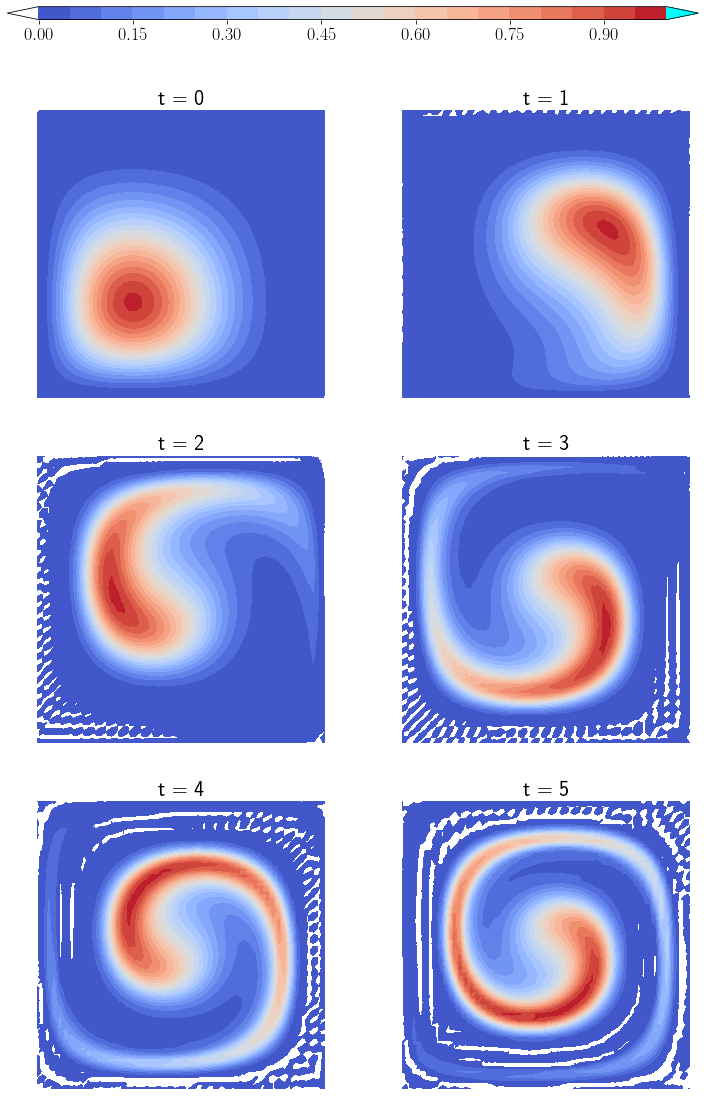

In [16]:
# The solution is stable, and it's not diffusive as the implicit Euler scheme.
fig, ax = plt.subplots(3, 2, figsize=(12,18))

frame_index = int(1.0/dt_num)

print(frame_index)
for i, ax_elem in enumerate(ax.flatten()):
    cb = ax_elem.tricontourf(triang, u1[frame_index*i].vector()[v_to_d], cmap='coolwarm', levels=np.linspace(0, 1, 21), extend='both')
    cb.cmap.set_under('white')
    cb.cmap.set_over('cyan')
    ax_elem.set_aspect('equal')
    ax_elem.set_title('t = ' + str(i))

cbaxes = fig.add_axes([0.1, 0.95, 0.8, 0.01]) 
fig.colorbar(cb, cax=cbaxes, orientation='horizontal')

for ax_elem in ax.flatten():
    ax_elem.axis('off')

plt.show()